In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from numpy import mean
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [309]:
data = pd.read_csv('spectra_blups.csv')
data= data.loc[data['Rep'] == 1, :]
data.reset_index(inplace= True)
data= data.loc[data['note'] != 'Hybrid', :]
data = data.loc[-data['genotype'].isin(['B73', 'Mo17']), :]
#data  = data.loc[data['Trt']== 'LN', :]


In [310]:
data

,index,genotype,PLOT.ID,rows,ranges,Block,Rep,Trt,year,note,...,X2491,X2492,X2493,X2494,X2495,X2496,X2497,X2498,X2499,X2500
55,119,BGEM-0001-N,1313,13,7,1,1,HN,2022,BGEM_Tall_early,...,0.047039,0.046910,0.046745,0.046547,0.046383,0.046231,0.046113,0.046034,0.045907,0.045765
56,121,BGEM-0002-N,1314,14,7,1,1,HN,2022,BGEM_Tall_early,...,0.049191,0.048992,0.048779,0.048630,0.048459,0.048253,0.048114,0.047977,0.047840,0.047732
58,125,BGEM-0003-N,1111,11,3,1,1,HN,2022,BGEM_Tall_late,...,0.048976,0.048711,0.048490,0.048318,0.048166,0.048106,0.047983,0.047799,0.047680,0.047510
60,128,BGEM-0004-N,1298,48,6,1,1,HN,2022,BGEM_Short_late,...,0.052943,0.052751,0.052555,0.052341,0.052103,0.051852,0.051687,0.051628,0.051477,0.051321
62,132,BGEM-0005-N,1321,21,7,1,1,HN,2022,BGEM_Tall_early,...,0.050270,0.050102,0.049913,0.049728,0.049515,0.049315,0.049188,0.049123,0.049006,0.048822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,2250,BGEM-0324-N,2137,37,3,2,1,LN,2022,BGEM_Tall_late,...,0.051868,0.051686,0.051442,0.051306,0.051132,0.050842,0.050676,0.050524,0.050362,0.050302
1118,2251,BGEM-0325-N,2047,47,1,2,1,LN,2022,BGEM_Tall_late,...,0.052182,0.051997,0.051808,0.051615,0.051431,0.051247,0.051087,0.050938,0.050791,0.050630
1119,2253,BGEM-0326-N,2066,16,2,2,1,LN,2022,BGEM_Short_early,...,0.052589,0.052431,0.052255,0.052073,0.051893,0.051737,0.051565,0.051325,0.051162,0.051050
1120,2256,BGEM-0327-N,2105,5,3,2,1,LN,2022,BGEM_Short_early,...,0.053383,0.053190,0.052980,0.052841,0.052704,0.052493,0.052338,0.052174,0.051976,0.051870


In [311]:
data.columns =data.columns.str.replace('X', '')

In [312]:
data.columns[0:15]

Index(['index', 'genotype', 'PLOT.ID', 'rows', 'ranges', 'Block', 'Rep', 'Trt',
       'year', 'note', 'Group', 'Calibration', 'ASD', '350', '351'],
      dtype='object')

In [313]:
data['Group']

55      Inbred
56      Inbred
58      Inbred
60      Inbred
62      Inbred
         ...  
1117    Inbred
1118    Inbred
1119    Inbred
1120    Inbred
1121    Inbred
Name: Group, Length: 609, dtype: object

In [314]:
data[['genotype', 'PLOT.ID', 'rows', 'ranges', 'Block', 'Rep', 'Trt', 'year',
       'note', 'Group', 'Calibration', 'ASD']] = data[['genotype', 'PLOT.ID', 'rows', 'ranges', 'Block', 'Rep', 'Trt', 'year',
       'note', 'Group', 'Calibration', 'ASD']].astype('category')

In [315]:
position_350 = data.columns.get_loc('350')
position_2500 = data.columns.get_loc('2500') + 1 
X = data.iloc[:, position_350 : position_2500]

In [316]:
X

,350,351,352,353,354,355,356,357,358,359,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
55,0.074977,0.072681,0.070706,0.069901,0.071965,0.069335,0.065900,0.065798,0.066554,0.063296,...,0.047039,0.046910,0.046745,0.046547,0.046383,0.046231,0.046113,0.046034,0.045907,0.045765
56,0.074977,0.072305,0.070633,0.069901,0.071965,0.069335,0.065900,0.065706,0.066456,0.063296,...,0.049191,0.048992,0.048779,0.048630,0.048459,0.048253,0.048114,0.047977,0.047840,0.047732
58,0.074977,0.072664,0.070641,0.069901,0.071965,0.069335,0.065900,0.064761,0.066382,0.063296,...,0.048976,0.048711,0.048490,0.048318,0.048166,0.048106,0.047983,0.047799,0.047680,0.047510
60,0.074977,0.073020,0.070656,0.069901,0.071965,0.069335,0.065900,0.064554,0.066631,0.063296,...,0.052943,0.052751,0.052555,0.052341,0.052103,0.051852,0.051687,0.051628,0.051477,0.051321
62,0.074977,0.073703,0.070722,0.069901,0.071965,0.069335,0.065900,0.065915,0.066948,0.063296,...,0.050270,0.050102,0.049913,0.049728,0.049515,0.049315,0.049188,0.049123,0.049006,0.048822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,0.083192,0.079482,0.076508,0.075413,0.074210,0.073554,0.070912,0.068110,0.068402,0.066951,...,0.051868,0.051686,0.051442,0.051306,0.051132,0.050842,0.050676,0.050524,0.050362,0.050302
1118,0.083912,0.079585,0.076704,0.075775,0.074007,0.074168,0.071480,0.068334,0.069530,0.067488,...,0.052182,0.051997,0.051808,0.051615,0.051431,0.051247,0.051087,0.050938,0.050791,0.050630
1119,0.083259,0.079415,0.076692,0.075799,0.074208,0.073514,0.071540,0.068684,0.068723,0.067059,...,0.052589,0.052431,0.052255,0.052073,0.051893,0.051737,0.051565,0.051325,0.051162,0.051050
1120,0.081785,0.079500,0.076721,0.075646,0.073730,0.073496,0.071402,0.068440,0.068223,0.066524,...,0.053383,0.053190,0.052980,0.052841,0.052704,0.052493,0.052338,0.052174,0.051976,0.051870


In [317]:
group2 = []
for i in data['Group']:
    if i == 'Hybrid':
        group2.append(1)
    else:
        group2.append(2)

In [318]:
np.unique(data['note'])

array(['BGEM_Short_early', 'BGEM_Short_late', 'BGEM_Tall_early',
       'BGEM_Tall_late'], dtype=object)

In [319]:
note2 = []
for i in data['note']:
    if i == 'BGEM_Short_early':
        note2.append(1)
    elif i ==  'BGEM_Short_late':
        note2.append(2)
    elif i == 'BGEM_Tall_early':
        note2.append(3)
    elif i == 'BGEM_Tall_late':
        note2.append(4)
    else:
        note2.append(5)
    

In [320]:
data.insert(8, 'note2', note2)

In [321]:
data.insert(8, 'Group2' , group2)

In [322]:
y = data.loc[:, 'note2'].reset_index(drop=True)

In [323]:
y

0      3
1      3
2      4
3      2
4      3
      ..
604    4
605    4
606    1
607    1
608    4
Name: note2, Length: 609, dtype: int64

In [111]:
test_set = pd.read_csv('2022_Brooke_v2.csv')

In [112]:
test_set =test_set.loc[test_set['Growth Stage'] == 2 , :] 

In [113]:
test_set.dropna(inplace=True)

In [24]:
test_set = test_set[['Unnamed: 0', 'Genotype', 'PLOT ID', 'Plant Number', 'Trt', 'Rep',
       'Growth Stage', 'Fresh_Weight', 'Leaf_Area', 'SPAD_1', 'SPAD_2 ',
       'SPAD_3',] + a]

NameError: name 'a' is not defined

In [32]:
test_set['Group'] = test_set['Group'].astype('category')

In [62]:
test_set['Trt'].value_counts()

MN        69
HN        68
Normal    68
LN        68
Name: Trt, dtype: int64

In [1075]:
#test_set = test_set.loc[test_set['Trt'].isin(['Normal','HN']), :]

In [63]:
position_first = test_set.columns.get_loc('350')
position_last = test_set.columns.get_loc('2500') + 1 
X_test = test_set.iloc[:, position_first : position_2500]

In [64]:
group = []
for i in test_set['PLOT ID']:
    if str(i)[0] == '1' or str(i)[0] == '2':
        group.append('Inbred')
    else:
            group.append('Hybrid')

In [65]:
test_set.insert(3, 'Group', group)

In [66]:
y_test = test_set['Group']

In [324]:
random_state = 2
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=random_state)

In [329]:
SVC_model = svm.SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=1)
logreg_model = LogisticRegression()

In [330]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [331]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
logreg_prediction= logreg_model.predict(X_test)

In [332]:
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))
print(accuracy_score(logreg_prediction, y_test))

0.25136612021857924
0.2568306010928962
0.28415300546448086


In [127]:
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=10,
                                 min_samples_leaf=3,
                                 min_samples_split= 5,
                                 bootstrap = True,
                                 n_jobs=2)

In [128]:
#
# Fit the model “gini”, “entropy”, “log_loss”}, 
#
forest.fit(X_train, y_train)
 
#
# Measure model performance
#
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.217


In [659]:
forest.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 2,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [1099]:
# Feature Importance
result = permutation_importance(forest, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index = X_train.columns)

In [1102]:
forest_importances.sort_values(ascending = False, inplace= True)
forest_importances.head(50)

444     0.003214
1067    0.002381
536     0.002143
732     0.002024
733     0.002024
482     0.001905
1603    0.001667
1514    0.001667
1060    0.001667
435     0.001548
1543    0.001548
473     0.001429
2242    0.001310
1461    0.001310
363     0.001310
1058    0.001310
1055    0.001190
654     0.001190
1584    0.001190
430     0.001190
1533    0.001071
531     0.001071
2140    0.001071
393     0.001071
1519    0.001071
390     0.001071
695     0.001071
632     0.001071
448     0.000952
662     0.000952
494     0.000952
731     0.000952
460     0.000952
2163    0.000833
406     0.000833
468     0.000714
728     0.000714
359     0.000714
1936    0.000714
2171    0.000714
1223    0.000595
1193    0.000595
1503    0.000595
358     0.000595
2257    0.000595
1186    0.000595
951     0.000595
1752    0.000476
1142    0.000476
597     0.000357
dtype: float64

In [1178]:
forest_importances[70:100]

724     0.000119
1072    0.000000
1052    0.000000
1051    0.000000
1107    0.000000
1137    0.000000
1136    0.000000
1135    0.000000
1134    0.000000
1133    0.000000
1132    0.000000
1068    0.000000
1071    0.000000
1069    0.000000
1070    0.000000
1131    0.000000
1054    0.000000
1073    0.000000
1074    0.000000
1075    0.000000
1076    0.000000
1130    0.000000
1066    0.000000
1064    0.000000
1065    0.000000
1056    0.000000
1047    0.000000
1048    0.000000
1049    0.000000
1050    0.000000
dtype: float64

In [1168]:
importance= forest_importances.to_frame()

In [1169]:
i2 =importance.reset_index()

In [1170]:
i2['index'] = i2['index'].astype('int')

In [1171]:
i2.rename(columns={'index':'band' , 0 : 'importance'}, inplace=True)

In [1174]:
i2 =i2.sort_values(by='band')

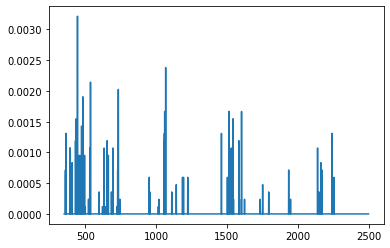

In [1175]:
plt.plot(i2['band'], i2['importance'])

In [1184]:
first_70 = i2.sort_values(by ='importance', ascending=False)[0:70]

In [1214]:
first_70 = first_70.sort_values(by='band', ascending=True)

In [1215]:
first_70_bands = first_70['band'].astype('string')

In [1217]:
a =first_70_bands.to_list()

In [1232]:
a

['358',
 '359',
 '363',
 '390',
 '393',
 '406',
 '430',
 '435',
 '442',
 '444',
 '448',
 '460',
 '468',
 '473',
 '482',
 '494',
 '499',
 '522',
 '531',
 '536',
 '597',
 '621',
 '632',
 '643',
 '654',
 '662',
 '684',
 '695',
 '726',
 '728',
 '731',
 '732',
 '733',
 '744',
 '951',
 '955',
 '1015',
 '1019',
 '1055',
 '1058',
 '1060',
 '1067',
 '1110',
 '1142',
 '1186',
 '1193',
 '1223',
 '1461',
 '1503',
 '1510',
 '1514',
 '1519',
 '1533',
 '1543',
 '1546',
 '1584',
 '1588',
 '1603',
 '1624',
 '1735',
 '1752',
 '1795',
 '1936',
 '1949',
 '2140',
 '2150',
 '2163',
 '2171',
 '2242',
 '2257']

In [1304]:
selected = data[['index', 'genotype', 'PLOT.ID', 'rows', 'ranges', 'Block', 'Rep', 'Trt',
       'year', 'note', 'Group', 'Calibration', 'ASD'] + a]

In [1518]:
selected[['genotype', 'PLOT.ID', 'rows', 'ranges', 'Block', 'Rep', 'Trt', 'year',
       'note', 'Group', 'Calibration', 'ASD']] = selected[['genotype', 'PLOT.ID', 'rows', 'ranges', 'Block', 'Rep', 'Trt', 'year',
       'note', 'Group', 'Calibration', 'ASD']].astype('category')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [1520]:
position_first = selected.columns.get_loc('358')
position_last = selected.columns.get_loc('2257') + 1 
X_train= selected.iloc[:, position_first : position_last]

In [1519]:
selected.dtypes[0:12]

index             int64
genotype       category
PLOT.ID        category
rows           category
ranges         category
Block          category
Rep            category
Trt            category
year           category
note           category
Group          category
Calibration    category
dtype: object

In [1522]:
y_train

0       Inbred
1       Inbred
2       Inbred
3       Inbred
4       Inbred
         ...  
1195    Hybrid
1196    Hybrid
1197    Hybrid
1198    Hybrid
1199    Hybrid
Name: Group, Length: 1200, dtype: category
Categories (2, object): ['Hybrid', 'Inbred']

In [1521]:
y_train = selected.loc[:, 'Group']

In [660]:
steps = [('svd', TruncatedSVD(n_components=10)), ('m', KNeighborsClassifier(n_neighbors=1))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.262 (0.047)


In [661]:
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', KNeighborsClassifier(n_neighbors=1))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.366 (0.070)


In [662]:
from sklearn.manifold import Isomap
# define the pipeline
steps = [('iso', Isomap(n_components=10)), ('m', KNeighborsClassifier(n_neighbors=1))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.276 (0.047)


In [663]:
from sklearn.manifold import LocallyLinearEmbedding
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=10)), ('m', KNeighborsClassifier(n_neighbors=1))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.270 (0.058)


In [664]:
from sklearn.manifold import LocallyLinearEmbedding
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=5, method='modified', n_neighbors=10)), ('m', KNeighborsClassifier(n_neighbors=1))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.287 (0.057)


In [665]:
PCA_blups = PCA(n_components=2)
principal_comp = PCA_blups.fit_transform(X)

In [666]:
principal_blups_Df = pd.DataFrame(data = principal_comp
             , columns = ['principal component 1', 'principal component 2'])

In [667]:
print('Explained variation per principal component: {}'.format(PCA_blups.explained_variance_ratio_))

Explained variation per principal component: [0.87266099 0.06973509]


<Figure size 432x288 with 0 Axes>

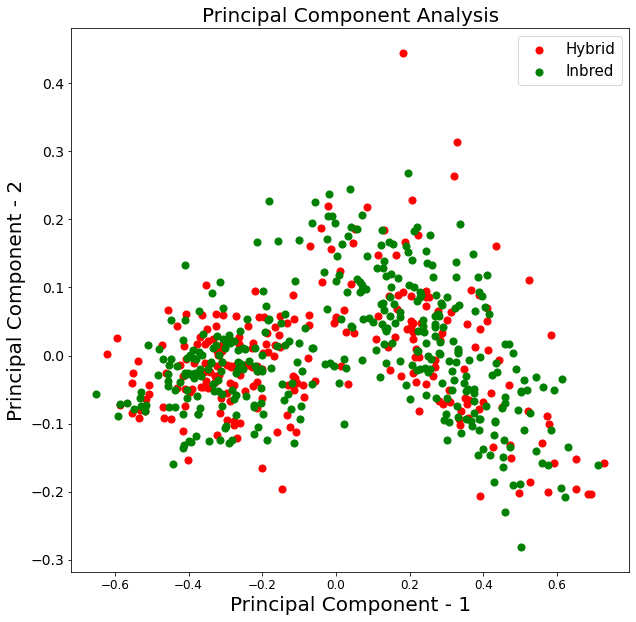

In [668]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = ['Hybrid', 'Inbred']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['Group'] == target
    plt.scatter(principal_blups_Df.loc[indicesToKeep, 'principal component 1']
               , principal_blups_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [669]:
data['Group']

0       Inbred
1       Inbred
2       Inbred
3       Inbred
4       Inbred
         ...  
1195    Hybrid
1196    Hybrid
1197    Hybrid
1198    Hybrid
1199    Hybrid
Name: Group, Length: 1200, dtype: category
Categories (2, object): ['Hybrid', 'Inbred']

In [1776]:
from sklearn.decomposition import PCA
pca_spectra = PCA(n_components=5)
principalComponents_spectra = pca_spectra.fit_transform(X)

In [1777]:
pca_explained =pca_spectra.explained_variance_ratio_

In [1778]:
pca_df = pd.DataFrame(
    data=principalComponents_spectra, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [1779]:
pca_df

,PC1,PC2,PC3,PC4,PC5
0,-0.213815,0.166827,0.076184,-0.011928,0.042922
1,-0.253658,-0.020129,-0.052851,-0.004830,0.008809
2,-0.272280,-0.058635,-0.088967,0.001167,0.001705
3,0.071897,-0.007135,-0.173800,-0.027143,0.031009
4,-0.186360,-0.124628,-0.109634,0.008589,-0.009645
...,...,...,...,...,...
604,0.276585,0.060858,0.055251,0.014119,-0.005410
605,0.432652,-0.096938,0.040226,-0.011445,-0.001393
606,0.231830,0.088999,-0.086200,0.002189,-0.021680
607,0.264359,0.115778,-0.098613,-0.002739,-0.013700


In [242]:
target_names = {
    1:'BGEM_Short_early', 
    2:'BGEM_Short_late',
    3:'BGEM_Tall_early',
    4:'BGEM_Tall_late',
}
 
pca_df['note2'] = y
pca_df['note2'] = pca_df['note2'].map(target_names)
 
pca_df


NameError: name 'pca_df' is not defined

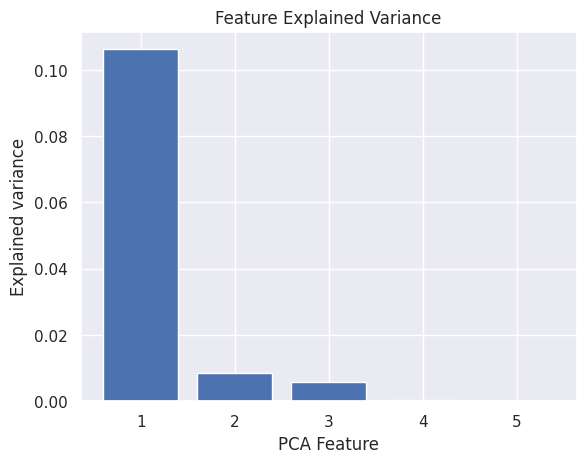

In [1782]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()
 

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca_spectra.explained_variance_)+1),
    pca_spectra.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

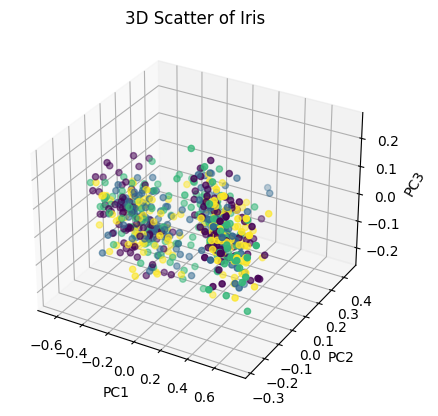

In [1783]:
import numpy as np
import matplotlib.pyplot as plt
 
from mpl_toolkits import mplot3d
plt.style.use('default')
 
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = pca_df.iloc[:,0]
ydata = pca_df.iloc[:,1]
zdata = pca_df.iloc[:,2]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=note2, cmap='viridis')
 
# Plot title of graph
plt.title(f'3D Scatter of Iris')
 
# Plot x, y, z even ticks
#ticks = np.linspace(-1, 1, num=10)
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
#ax.set_zticks(ticks)
 
# Plot x, y, z labels
ax.set_xlabel('PC1', rotation=0)
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', rotation=60)
plt.show()

In [333]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='note2', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

NameError: name 'pca_df' is not defined

In [1785]:
X = pca_df.iloc[:, 0:4]

In [1786]:
y = pca_df.iloc[:, 5]

In [304]:
#random_state = 2
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)#, random_state=random_state)

In [305]:
SVC_model = svm.SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=3)
logreg_model = LogisticRegression()

In [306]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [307]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
logreg_prediction= logreg_model.predict(X_test)

In [308]:
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))
print(accuracy_score(logreg_prediction, y_test))

0.25
0.2608695652173913
0.2826086956521739


In [159]:
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 min_samples_leaf=3,
                                 min_samples_split= 5,
                                 bootstrap = True,
                                 n_jobs=2)

In [160]:
#
# Fit the model “gini”, “entropy”, “log_loss”}, 
#
forest.fit(X_train, y_train)
 
#
# Measure model performance
#
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.320


In [134]:
lda = LinearDiscriminantAnalysis(n_components=3)

In [135]:
X_train = lda.fit_transform(X_train,y_train)


In [136]:
X_test = lda.transform(X_test)

In [137]:
clf=LinearDiscriminantAnalysis(n_components=3)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9953051643192489

In [138]:
y_pred = clf.predict(X_test)

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.43      0.49        23
           2       0.55      0.52      0.53        23
           3       0.52      0.52      0.52        23
           4       0.48      0.61      0.54        23

    accuracy                           0.52        92
   macro avg       0.53      0.52      0.52        92
weighted avg       0.53      0.52      0.52        92



In [209]:
random_state= 3
n_neighbors = 3




# Reduce dimension with LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis(n_components=3)

rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=random_state)
scores = cross_val_score(model, X, y, cv=rkf)  
print(scores)

'''
# Fit the method's model
model.fit(X, y)
X = model.transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

scores = cross_val_score(knn, X, y, cv=5)  
print(scores)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(X_train, y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(X_test, y_test)

# Embed the data set in 2 dimensions using the fitted model
X_embedded = model.transform(X)
'''



[0.49180328 0.55737705 0.55737705 0.52459016 0.57377049 0.44262295
 0.55737705 0.50819672 0.59016393 0.52459016 0.57377049 0.59016393
 0.54098361 0.50819672 0.50819672 0.59016393 0.55737705 0.52459016
 0.55737705 0.55737705 0.49180328 0.55737705 0.57377049 0.49180328
 0.55737705]


"\n# Fit the method's model\nmodel.fit(X, y)\nX = model.transform(X)\n\n# Split into train/test\nX_train, X_test, y_train, y_test =     train_test_split(X, y, test_size=0.5, stratify=y,\n                     random_state=random_state)\n\n# Use a nearest neighbor classifier to evaluate the methods\nknn = KNeighborsClassifier(n_neighbors=n_neighbors)\n\nscores = cross_val_score(knn, X, y, cv=5)  \nprint(scores)\n\n# Fit a nearest neighbor classifier on the embedded training set\nknn.fit(X_train, y_train)\n\n# Compute the nearest neighbor accuracy on the embedded test set\nacc_knn = knn.score(X_test, y_test)\n\n# Embed the data set in 2 dimensions using the fitted model\nX_embedded = model.transform(X)\n"

In [210]:
scores

array([0.49180328, 0.55737705, 0.55737705, 0.52459016, 0.57377049,
       0.44262295, 0.55737705, 0.50819672, 0.59016393, 0.52459016,
       0.57377049, 0.59016393, 0.54098361, 0.50819672, 0.50819672,
       0.59016393, 0.55737705, 0.52459016, 0.55737705, 0.55737705,
       0.49180328, 0.55737705, 0.57377049, 0.49180328, 0.55737705])

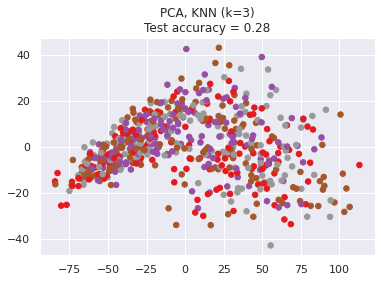

In [373]:
random_state= 6
n_neighbors = 3

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)


# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=3, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=3))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=3,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors) #svm.SVC() 

#RandomForestClassifier()
# KNeighborsClassifier(n_neighbors=n_neighbors) #LogisticRegression()  
    

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca)] #[('PCA', pca), ('LDA', lda), ('NCA', nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

In [374]:
LDAs =pd.DataFrame(X_embedded, columns=['PC1', 'PC2', 'PC3'])

In [375]:
labels = data['note'].reset_index(drop=True)
labels = pd.DataFrame(labels, columns=['note'])

In [376]:
merged = pd.concat([LDAs, labels] ,axis=1 )

In [377]:
merged

,PC1,PC2,PC3,note
0,-44.624165,-0.741744,11.222093,BGEM_Tall_early
1,-30.475900,6.060141,-5.488543,BGEM_Tall_early
2,-30.244915,7.556219,-10.727571,BGEM_Tall_late
3,15.347050,24.767934,-13.070591,BGEM_Short_late
4,-11.338496,7.088578,-12.252030,BGEM_Tall_early
...,...,...,...,...
604,31.573600,-3.384872,7.606958,BGEM_Tall_late
605,62.557365,-14.710017,-4.070231,BGEM_Tall_late
606,29.184768,19.675607,6.216542,BGEM_Short_early
607,31.320056,23.825872,3.855504,BGEM_Short_early


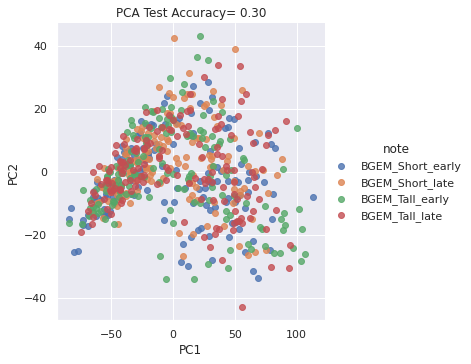

In [380]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=merged, 
    hue='note', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('PCA Test Accuracy= 0.30')
plt.show()